## RQ#2 - Haseeb & Aayusha

In [6]:
import pandas as pd

df = pd.read_csv('./datasets/final-dataset.csv')  
display(df.head())

,repo,stars,forks,pull_requests,pScore,pScore_normalized,popular,s_num_nodes,s_weighted_mean_degree,s_num_component,...,t_num_dev_nodes,t_num_file_nodes,t_num_dev_per_file,t_num_file_per_dev,t_graph_density,proj_name,month,st_num_dev,t_net_overlap,s_net_overlap
0,echarts,62125,19696,30,82721,1.0,1,4,5.000000,1,...,4,535,1.220561,163.250000,0.305140,echarts,0,0,0.000000,0.000000
1,echarts,62125,19696,30,82721,1.0,1,5,4.800000,2,...,4,414,1.881643,194.750000,0.470411,echarts,1,0,0.064156,0.000000
2,echarts,62125,19696,30,82721,1.0,1,6,9.333333,1,...,3,606,1.110561,224.333333,0.370187,echarts,2,0,0.017894,0.222222
3,echarts,62125,19696,30,82721,1.0,1,8,28.000000,1,...,2,510,1.039216,265.000000,0.519608,echarts,3,0,0.025705,0.250000
4,echarts,62125,19696,30,82721,1.0,1,7,11.428571,1,...,3,60,1.500000,30.000000,0.500000,echarts,4,0,0.057878,0.291667


#### Time Series Analysis

<Figure size 1500x1000 with 0 Axes>

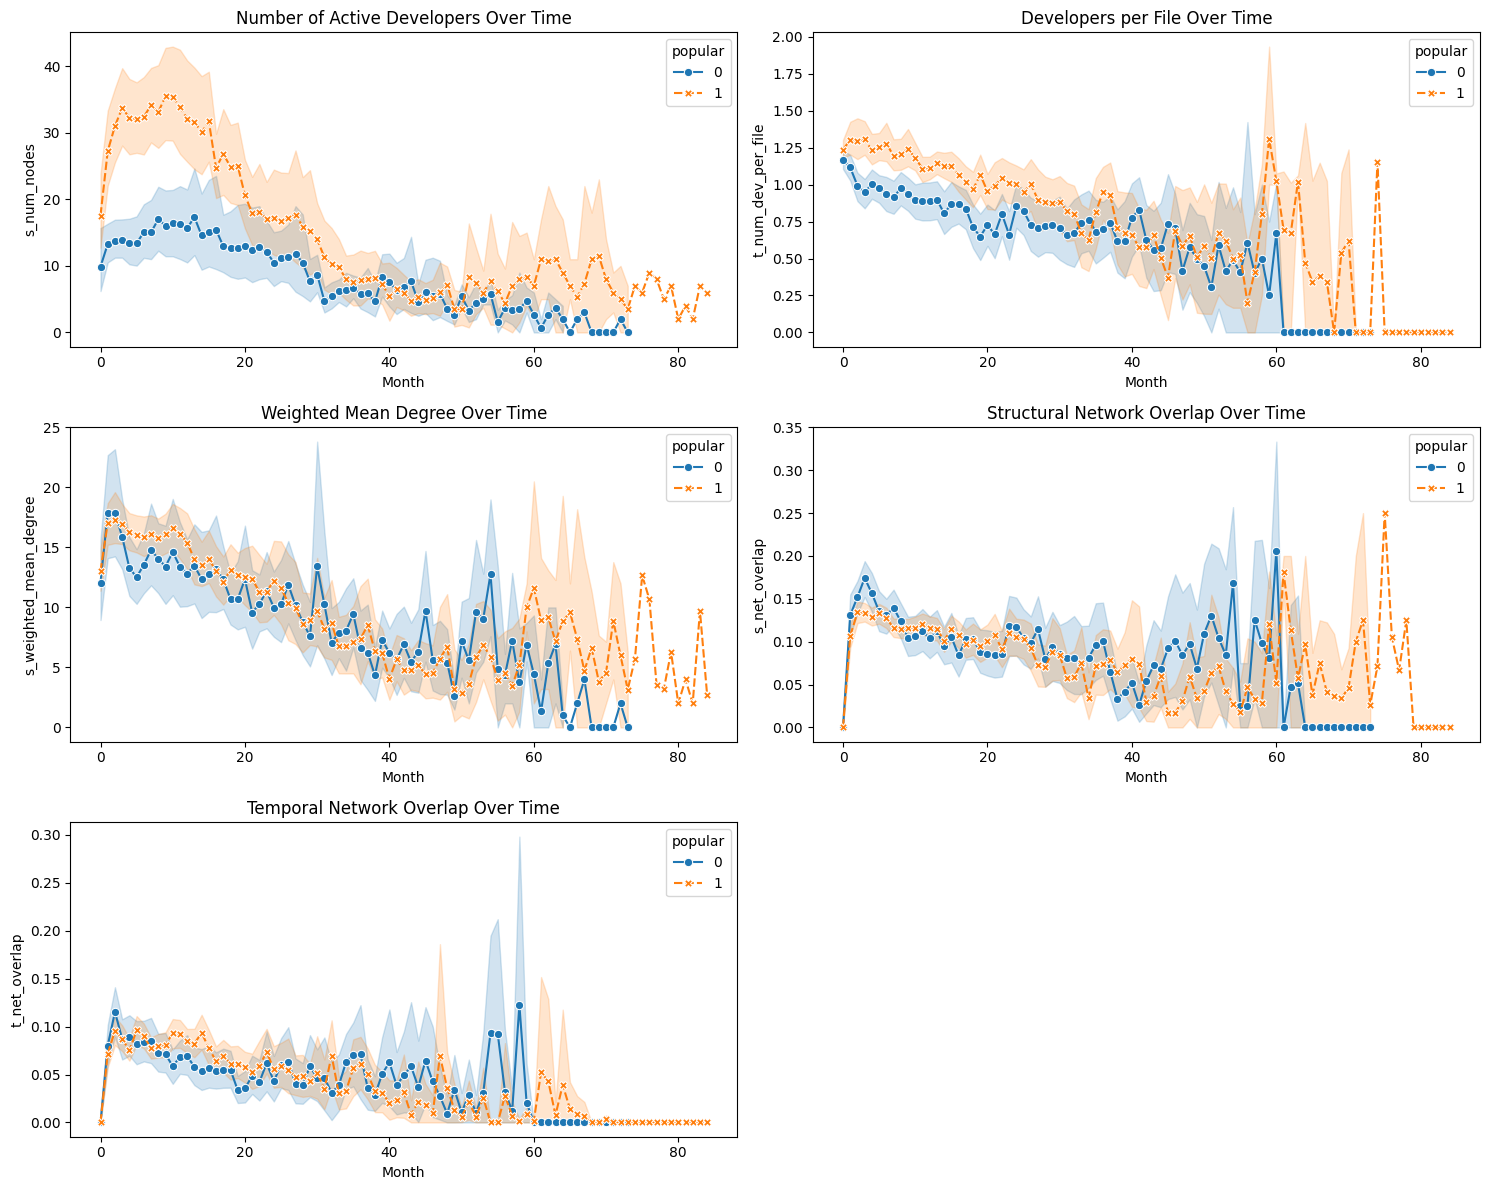

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
metrics = ['s_num_nodes', 't_num_dev_per_file', 's_weighted_mean_degree', 's_net_overlap', 't_net_overlap']
titles = ["Number of Active Developers Over Time", "Developers per File Over Time",
          "Weighted Mean Degree Over Time", "Structural Network Overlap Over Time", "Temporal Network Overlap Over Time"]

fig, axes = plt.subplots(3, 2, figsize=(15, 12))
for i, metric in enumerate(metrics):
    ax = axes[i//2, i%2]
    sns.lineplot(data=df, x='month', y=metric, hue='popular', style='popular', markers=True, ax=ax)
    ax.set_title(titles[i])
    ax.set_xlabel("Month")
    ax.set_ylabel(metric)

fig.delaxes(axes[2, 1])
plt.tight_layout()
plt.show()

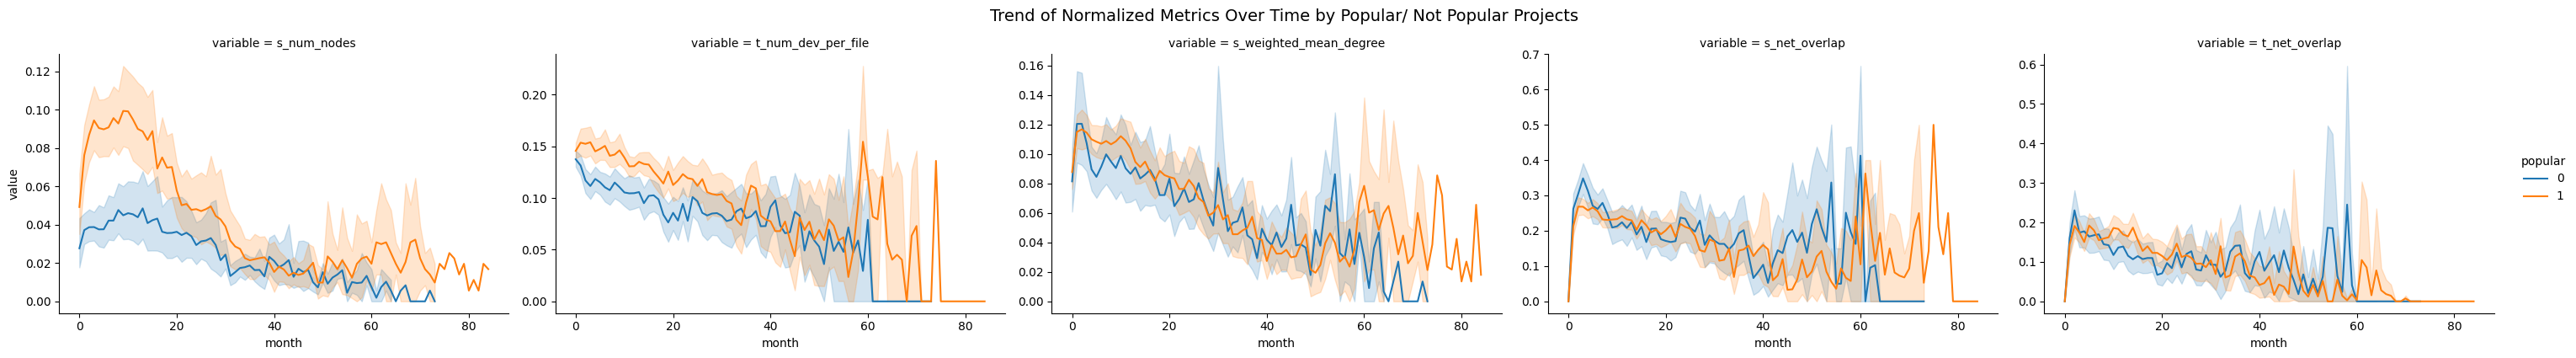

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

metrics = ['s_num_nodes', 't_num_dev_per_file', 's_weighted_mean_degree', 's_net_overlap', 't_net_overlap']

scaler = MinMaxScaler()
df[metrics] = scaler.fit_transform(df[metrics])

g = sns.FacetGrid(df.melt(id_vars=['month', 'popular'], value_vars=metrics), col="variable", hue="popular", height=4, aspect=1.5, sharex=True, sharey=False)
g.map_dataframe(sns.lineplot, x="month", y="value")
g.add_legend()
plt.suptitle("Trend of Normalized Metrics Over Time by Popular/ Not Popular Projects", y=1.05, fontsize=14)
plt.show()

#### Rolling window Analysis

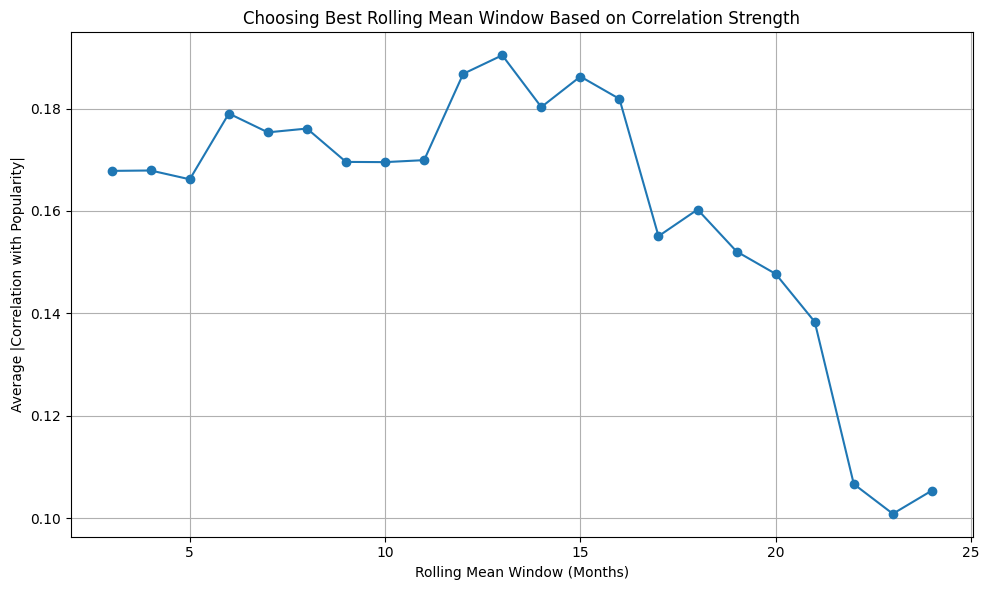


Best Rolling Window based on average correlation: 13 months


In [10]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

df = pd.read_csv('./datasets/final-dataset.csv')
df['month'] = pd.to_datetime(df['month'], errors='coerce')

numeric_columns = ['s_num_nodes', 't_num_dev_per_file', 's_weighted_mean_degree',
                   's_net_overlap', 't_net_overlap', 'popular']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

rolling_terms = list(range(3, 25))
mean_abs_corr_scores = []

for window in rolling_terms:
    df_sorted = df.sort_values(by=['proj_name', 'month'])
    df_rolling = df_sorted.groupby('proj_name').rolling(window, on='month')[numeric_columns].mean().reset_index()
    aggregated_df = df_rolling.groupby('proj_name')[numeric_columns].mean().reset_index()
    aggregated_df.replace([np.inf, -np.inf], np.nan, inplace=True)
    aggregated_df.dropna(inplace=True)

    abs_corrs = []
    for col in numeric_columns:
        if col != 'popular':
            try:
                corr, _ = pearsonr(aggregated_df[col], aggregated_df['popular'])
                abs_corrs.append(abs(corr))
            except Exception:
                abs_corrs.append(0)
    
    mean_abs_corr_scores.append(np.mean(abs_corrs))

plt.figure(figsize=(10, 6))
plt.plot(rolling_terms, mean_abs_corr_scores, marker='o')
plt.xlabel("Rolling Mean Window (Months)")
plt.ylabel("Average |Correlation with Popularity|")
plt.title("Choosing Best Rolling Mean Window Based on Correlation Strength")
plt.grid(True)
plt.tight_layout()
plt.show()

best_window = rolling_terms[np.argmax(mean_abs_corr_scores)]
print(f"\nBest Rolling Window based on average correlation: {best_window} months")

#### Correlation Analysis

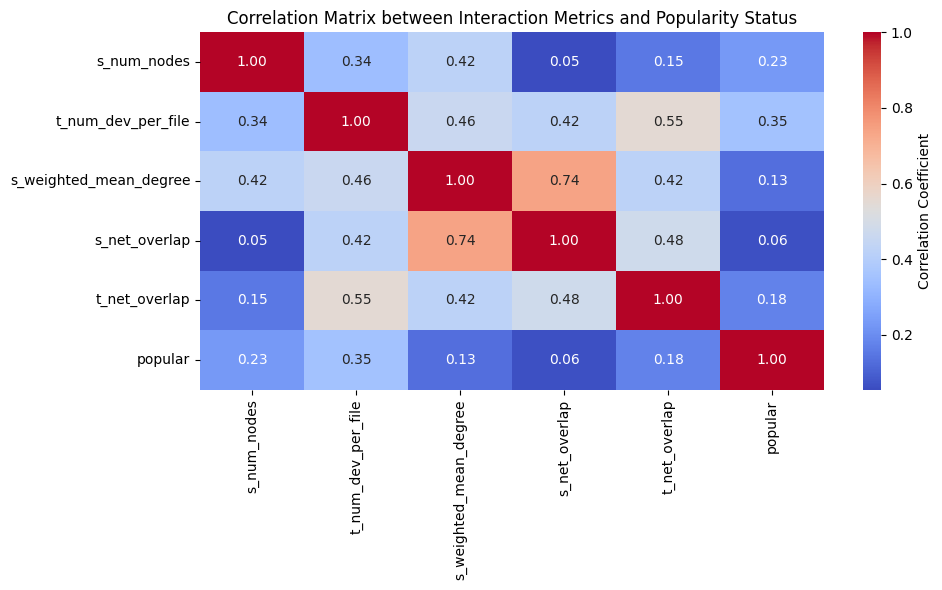

s_num_nodes                    → Pearson Correlation: 0.229, P-Value: 0.0023
t_num_dev_per_file             → Pearson Correlation: 0.353, P-Value: 0.0000
s_weighted_mean_degree         → Pearson Correlation: 0.129, P-Value: 0.0884
s_net_overlap                  → Pearson Correlation: 0.065, P-Value: 0.3934
t_net_overlap                  → Pearson Correlation: 0.177, P-Value: 0.0194


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

df = pd.read_csv('./datasets/final-dataset.csv')
df['month'] = pd.to_datetime(df['month'], errors='coerce')
numeric_columns = ['s_num_nodes', 't_num_dev_per_file', 's_weighted_mean_degree',
                   's_net_overlap', 't_net_overlap', 'popular']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

rolling_window = 13
df_sorted = df.sort_values(by=['proj_name', 'month'])
df_rolling = df_sorted.groupby('proj_name').rolling(rolling_window, on='month')[numeric_columns].mean().reset_index()
aggregated_df = df_rolling.groupby('proj_name')[numeric_columns].mean().reset_index()
aggregated_df.replace([np.inf, -np.inf], np.nan, inplace=True)
aggregated_df.dropna(inplace=True)

corr_matrix = aggregated_df[numeric_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix between Interaction Metrics and Popularity Status')
plt.tight_layout()
plt.show()

for col in numeric_columns:
    if col != 'popular':
        corr, pval = pearsonr(aggregated_df[col], aggregated_df['popular'])
        print(f"{col:<30} → Pearson Correlation: {corr:.3f}, P-Value: {pval:.4f}")

#### Box Plot Analysis

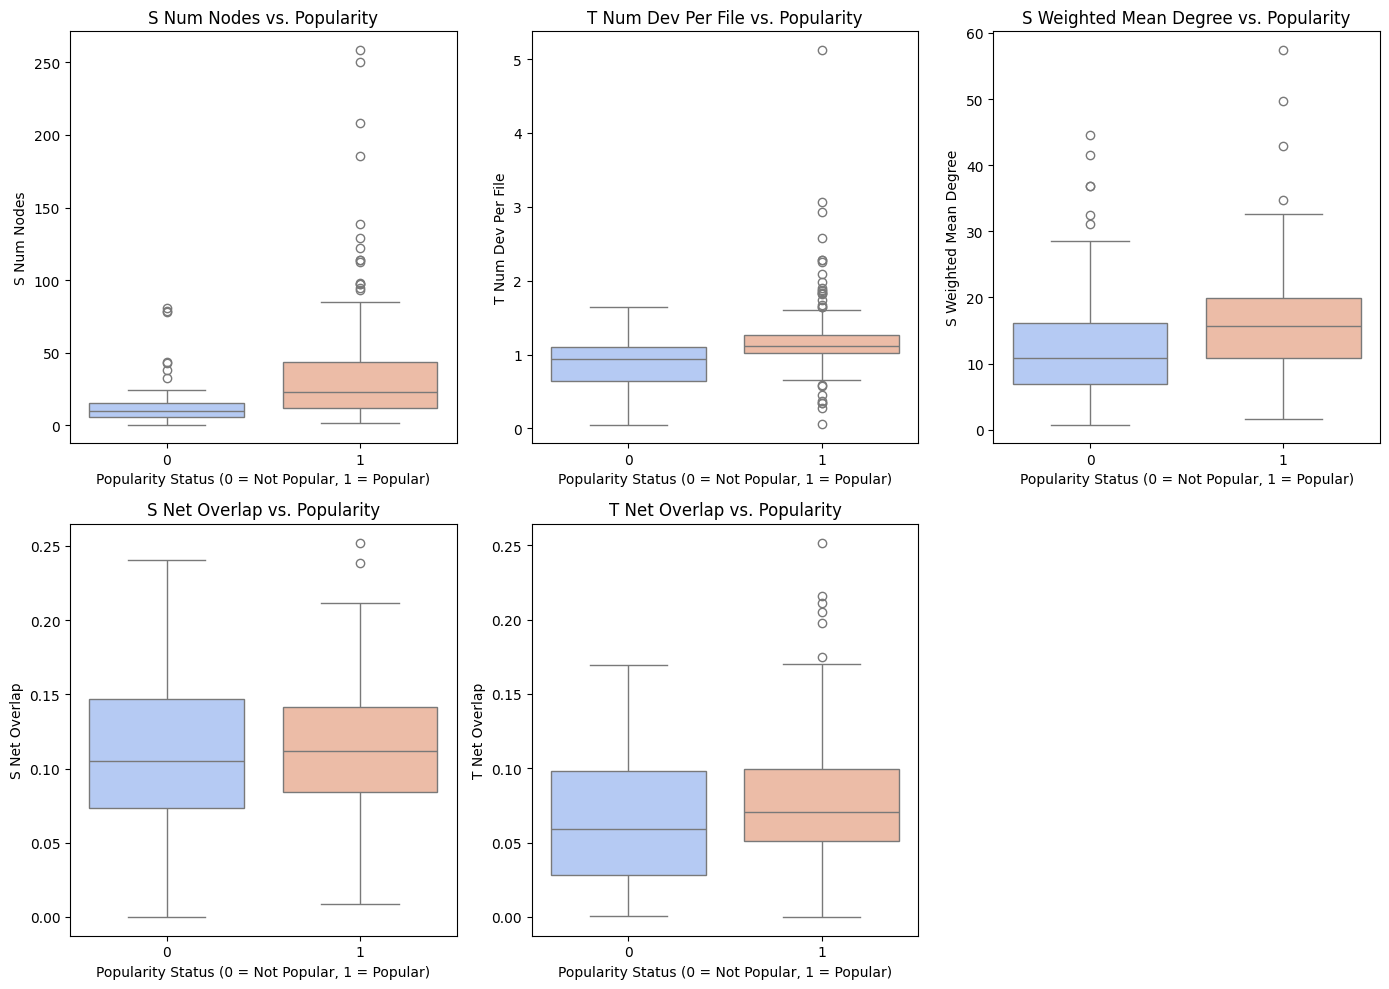

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./datasets/final-dataset.csv')
df['month'] = pd.to_datetime(df['month'], errors='coerce')

numeric_columns = ['s_num_nodes', 't_num_dev_per_file', 's_weighted_mean_degree',
                   's_net_overlap', 't_net_overlap', 'popular']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

ROLLING_WINDOW = 13
df_sorted = df.sort_values(by=['proj_name', 'month'])
df_rolling = df_sorted.groupby('proj_name').rolling(ROLLING_WINDOW, on='month')[numeric_columns].mean().reset_index()
aggregated_df = df_rolling.groupby('proj_name')[numeric_columns].mean().reset_index()
aggregated_df['popular'] = aggregated_df['popular'].fillna(0).round().astype(int)

metrics = ['s_num_nodes', 't_num_dev_per_file', 's_weighted_mean_degree', 's_net_overlap', 't_net_overlap']

plt.figure(figsize=(14, 10))

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='popular', y=metric, hue='popular', data=aggregated_df, palette="coolwarm", legend=False)
    plt.xlabel("Popularity Status (0 = Not Popular, 1 = Popular)")
    plt.ylabel(metric.replace('_', ' ').title())
    plt.title(f"{metric.replace('_', ' ').title()} vs. Popularity")
    plt.tight_layout()

plt.show()
